## Stock Price Prediction Model


# step 1: we collect the stock dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("C:\ME\Sem 2\Mini project\lalpathlab.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2017-02-21,1001.00,1004.8,982.00,988.55,990.66,4539.0,643.0,4496606.0,2239.0,49.33,22.80,-12.45
1,2017-02-22,991.00,1002.0,981.25,985.30,987.67,6613.0,975.0,6531490.0,4382.0,66.26,20.75,-5.70
2,2017-02-23,984.15,995.8,975.00,981.50,986.54,3800.0,645.0,3748856.0,1973.0,51.92,20.80,-2.65
3,2017-02-27,981.15,996.0,970.00,973.55,980.11,3565.0,388.0,3494105.0,2290.0,64.24,26.00,-7.60
4,2017-02-28,976.55,983.9,971.50,975.45,976.61,4039.0,563.0,3944530.0,1526.0,37.78,12.40,-1.10


In [4]:
df1=df.reset_index()['Close']

In [5]:
df1.shape

(1090,)

In [6]:
df1

0        988.55
1        985.30
2        981.50
3        973.55
4        975.45
         ...   
1085    3515.30
1086    3435.05
1087    3459.40
1088    3423.80
1089    3415.30
Name: Close, Length: 1090, dtype: float64

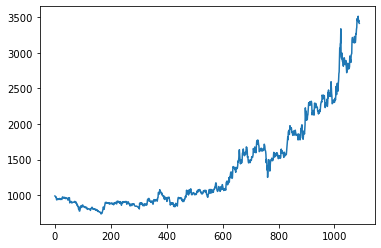

In [7]:
plt.plot(df1)

In [8]:
 ### LSTM are sensitive to scale the data so we apply MinMax scaler

# step 2: we need to preprocess the data

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))   ## we are converting our data in between 0 and 1 value
df1= scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1.shape

(1090, 1)

In [11]:
## now df1 is transfer into 0 to 1
df1

array([[0.09077006],
       [0.08960058],
       [0.08823318],
       ...,
       [0.97988485],
       [0.96707449],
       [0.96401583]])

## converting the data into train and test set

In [12]:
### splitting dataset into train and test split
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size

708

In [14]:
test_size

382

In [15]:
train_data

array([[0.09077006],
       [0.08960058],
       [0.08823318],
       [0.08537244],
       [0.08605614],
       [0.07707809],
       [0.07168046],
       [0.07060094],
       [0.07770781],
       [0.07419935],
       [0.0740914 ],
       [0.07405542],
       [0.0731738 ],
       [0.07661029],
       [0.07419935],
       [0.07502699],
       [0.07612451],
       [0.07826556],
       [0.07365959],
       [0.07293991],
       [0.07527888],
       [0.07337172],
       [0.07673624],
       [0.07419935],
       [0.07358762],
       [0.07299388],
       [0.08319539],
       [0.08517452],
       [0.086362  ],
       [0.08305146],
       [0.08137819],
       [0.08252969],
       [0.08038863],
       [0.08301547],
       [0.08396905],
       [0.08186398],
       [0.07966895],
       [0.08263764],
       [0.07736596],
       [0.07866139],
       [0.08157611],
       [0.08107233],
       [0.07974091],
       [0.0779597 ],
       [0.07851745],
       [0.07803167],
       [0.07238215],
       [0.069

In [16]:
test_data

array([[0.2934149 ],
       [0.29843469],
       [0.33087442],
       [0.32493703],
       [0.32015113],
       [0.311371  ],
       [0.31892767],
       [0.33875495],
       [0.3354444 ],
       [0.32867938],
       [0.31763224],
       [0.30926592],
       [0.32482908],
       [0.34730119],
       [0.36595898],
       [0.37126664],
       [0.3715905 ],
       [0.35309464],
       [0.37346168],
       [0.37175243],
       [0.35980569],
       [0.34874055],
       [0.3438647 ],
       [0.31541922],
       [0.3170565 ],
       [0.31622886],
       [0.32491904],
       [0.32707809],
       [0.32173444],
       [0.32781576],
       [0.33274559],
       [0.32157251],
       [0.32488305],
       [0.31714646],
       [0.32423534],
       [0.32907521],
       [0.32745592],
       [0.32520691],
       [0.32070889],
       [0.3263584 ],
       [0.33819719],
       [0.3527168 ],
       [0.34829075],
       [0.34199352],
       [0.3231918 ],
       [0.32105074],
       [0.31554516],
       [0.300

In [17]:
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_Step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]  ###i =0, 0,1,2,3----99 100
        dataX.append(a)           ## add a into dataset x and make the features / (independent variables)
        dataY.append(dataset[i + time_step,0]) ## add the last no in data y which is output / (dependent variable)
    return np.array(dataX), np.array(dataY)    

In [18]:
# reshape into x=t,x=t+1,x=t+2,x=t+3 and y=t+4
time_step = 100
x_train, y_train = create_dataset(train_data,time_step)
x_test,y_test = create_dataset(test_data,time_step)

In [19]:
print(x_train)

[[0.09077006 0.08960058 0.08823318 ... 0.0343109  0.04422454 0.04512415]
 [0.08960058 0.08823318 0.08537244 ... 0.04422454 0.04512415 0.04426053]
 [0.08823318 0.08537244 0.08605614 ... 0.04512415 0.04426053 0.03940266]
 ...
 [0.11842389 0.1243253  0.1209068  ... 0.27371357 0.27243613 0.27223822]
 [0.1243253  0.1209068  0.12812163 ... 0.27243613 0.27223822 0.28850306]
 [0.1209068  0.12812163 0.12677222 ... 0.27223822 0.28850306 0.28709968]]


In [20]:
print(x_test)

[[0.2934149  0.29843469 0.33087442 ... 0.28238575 0.2811263  0.28224181]
 [0.29843469 0.33087442 0.32493703 ... 0.2811263  0.28224181 0.28718964]
 [0.33087442 0.32493703 0.32015113 ... 0.28224181 0.28718964 0.32549478]
 ...
 [0.60505578 0.59418856 0.66872976 ... 0.98074847 0.98902483 1.        ]
 [0.59418856 0.66872976 0.6343289  ... 0.98902483 1.         0.97112271]
 [0.66872976 0.6343289  0.61054336 ... 1.         0.97112271 0.97988485]]


In [21]:
print(x_train.shape)

(607, 100)


In [22]:
print(x_test.shape)

(281, 100)


In [23]:
 # reshape input to be (samples, time steps,features) which require for LSTM 
    ##we need to convert data into 3 dimension(sample,timesteps,features)
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1] , 1) ## (x_train values = 607, 100,1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1] , 1)    ##(x_test values = 281,100,1)

# step 3: Creating the Stacked LSTM Model

In [24]:
## creating stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences = True,input_shape=(100, 1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = "mean_squared_error",optimizer = "Adam")   

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
#model.summary()

In [28]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 4s 399ms/step - loss: 0.0044 - val_loss: 0.0715
Epoch 2/100
10/10 [==============================] - 2s 175ms/step - loss: 0.0012 - val_loss: 0.0090
Epoch 3/100
10/10 [==============================] - 2s 161ms/step - loss: 5.7332e-04 - val_loss: 0.0033
Epoch 4/100
10/10 [==============================] - 2s 175ms/step - loss: 4.5543e-04 - val_loss: 0.0041
Epoch 5/100
10/10 [==============================] - 2s 196ms/step - loss: 3.8234e-04 - val_loss: 0.0032
Epoch 6/100
10/10 [==============================] - 2s 176ms/step - loss: 3.3749e-04 - val_loss: 0.0038
Epoch 7/100
10/10 [==============================] - 2s 191ms/step - loss: 3.2108e-04 - val_loss: 0.0031
Epoch 8/100
10/10 [==============================] - 2s 185ms/step - loss: 3.0565e-04 - val_loss: 0.0033
Epoch 9/100
10/10 [==============================] - 2s 178ms/step - loss: 3.0571e-04 - val_loss: 0.0031
Epoch 10/100
10/10 [==============================] - 2s 177ms/

10/10 [==============================] - 2s 180ms/step - loss: 1.5841e-04 - val_loss: 0.0028
Epoch 79/100
10/10 [==============================] - 2s 166ms/step - loss: 1.5331e-04 - val_loss: 0.0036
Epoch 80/100
10/10 [==============================] - 2s 177ms/step - loss: 1.5578e-04 - val_loss: 0.0028
Epoch 81/100
10/10 [==============================] - 2s 188ms/step - loss: 1.5642e-04 - val_loss: 0.0040
Epoch 82/100
10/10 [==============================] - 2s 184ms/step - loss: 1.5039e-04 - val_loss: 0.0064
Epoch 83/100
10/10 [==============================] - 2s 183ms/step - loss: 1.7491e-04 - val_loss: 0.0034
Epoch 84/100
10/10 [==============================] - 2s 180ms/step - loss: 1.5142e-04 - val_loss: 0.0027
Epoch 85/100
10/10 [==============================] - 2s 198ms/step - loss: 1.5060e-04 - val_loss: 0.0024
Epoch 86/100
10/10 [==============================] - 2s 172ms/step - loss: 1.4725e-04 - val_loss: 0.0021
Epoch 87/100
10/10 [==============================] - 2s 19

In [29]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [30]:
##Transformback to original form because we need to get RMSE value
train_predict=scaler.inverse_transform(train_predict) 
test_predict=scaler.inverse_transform(test_predict)

In [31]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1029.262236982233

In [32]:
### Test Data RMSE value
math.sqrt(mean_squared_error(y_test,test_predict))

2245.8469583567007

In [33]:
## the difference between test rmse and train rmse should be as low as possible the min difference shows best model performance

# Step 4: Predict the test data and plot the output

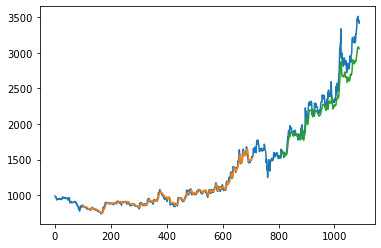

In [34]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
## in above visualization the blue line= original data, orange line = train data , green line= test data

In [38]:
len(test_data)

382

In [39]:
x_input=test_data[282:].reshape(1,-1)
x_input.shape

(1, 100)

In [40]:
temp_input=list(x_input)    ## just converting the x_input into the list
temp_input=temp_input[0].tolist()

In [41]:
temp_input

[0.6105433609211947,
 0.5965635120546959,
 0.557466714645556,
 0.5586541921554516,
 0.564267722202231,
 0.5633141417776178,
 0.5750089960417416,
 0.5742353364519611,
 0.5718603814321698,
 0.5765383231378193,
 0.5642137459517812,
 0.5681720043181,
 0.5849946023749549,
 0.580352644836272,
 0.5770241093918675,
 0.6017632241813601,
 0.6449082403742353,
 0.6173263763943864,
 0.6039942425332854,
 0.641183879093199,
 0.660705289672544,
 0.6548578625404822,
 0.625782655631522,
 0.6210327455919396,
 0.6606513134220943,
 0.6768981648074847,
 0.7093019071608491,
 0.7181000359841669,
 0.7778337531486146,
 0.8381252249010434,
 0.8099856063332134,
 0.8609211946743434,
 0.8646635480388627,
 0.9364519611370996,
 0.7961496941345807,
 0.7903382511694854,
 0.784994602374955,
 0.8141237855343648,
 0.7797409139978408,
 0.7708888089240733,
 0.7731378193594818,
 0.7564231738035265,
 0.7471752428931269,
 0.7636200071968333,
 0.7870456998920474,
 0.7902302986685859,
 0.7846887369557394,
 0.7617488305145734,
 0

# step 5: Predict the next 30 days and plot the output

In [42]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):  #5. after completing 100 timesteps at the 101th day it starts to implement
        #print(temp_input)
        x_input=np.array(temp_input[1:])   ## 6.we are getting the x_input from 1st index because we are starting from 101th day
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)  ## 
        x_input = x_input.reshape((1, n_steps, 1))  ## 7.same as 1st step
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)  ##same as 2nd step
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())   ##8.we are adding the yhat value into temp_input list
        temp_input=temp_input[1:]    
        #print(temp_input)
        lst_output.extend(yhat.tolist())   ## 9.this will be the final output and it runs till we got the 30 days output
        i=i+1
    else:
        x_input = x_input.reshape((1,n_steps,1)) ## 1.we are reshape the input value for lstm  
        yhat = model.predict(x_input, verbose=0)  ## 2.we stored the predicted value in yhat
        print(yhat[0])   
        temp_input.extend(yhat[0].tolist())  #3. we are adding the yhat value into temp_input list
        print(len(temp_input))
        lst_output.extend(yhat.tolist()) ##4. we are adding yhat into final output
        i=i+1  
    

print(lst_output)

[0.82844055]
101
1 day input [0.59656351 0.55746671 0.55865419 0.56426772 0.56331414 0.575009
 0.57423534 0.57186038 0.57653832 0.56421375 0.568172   0.5849946
 0.58035264 0.57702411 0.60176322 0.64490824 0.61732638 0.60399424
 0.64118388 0.66070529 0.65485786 0.62578266 0.62103275 0.66065131
 0.67689816 0.70930191 0.71810004 0.77783375 0.83812522 0.80998561
 0.86092119 0.86466355 0.93645196 0.79614969 0.79033825 0.7849946
 0.81412379 0.77974091 0.77088881 0.77313782 0.75642317 0.74717524
 0.76362001 0.7870457  0.7902303  0.78468874 0.76174883 0.75527168
 0.75662109 0.76534725 0.77594458 0.75557755 0.73186398 0.71433969
 0.72668226 0.74105793 0.74631162 0.76223462 0.75471393 0.73654192
 0.73265563 0.73853904 0.73709968 0.74433249 0.79877654 0.77855344
 0.78218784 0.77797769 0.76653472 0.80300468 0.80766463 0.81212666
 0.88019072 0.89170565 0.89233537 0.88562433 0.86950342 0.86853185
 0.87988485 0.86903562 0.86471752 0.89793091 0.88425693 0.87211227
 0.8670385  0.88161209 0.91255847 0.9

10 day output [[0.6218661]]
11 day input [0.568172   0.5849946  0.58035264 0.57702411 0.60176322 0.64490824
 0.61732638 0.60399424 0.64118388 0.66070529 0.65485786 0.62578266
 0.62103275 0.66065131 0.67689816 0.70930191 0.71810004 0.77783375
 0.83812522 0.80998561 0.86092119 0.86466355 0.93645196 0.79614969
 0.79033825 0.7849946  0.81412379 0.77974091 0.77088881 0.77313782
 0.75642317 0.74717524 0.76362001 0.7870457  0.7902303  0.78468874
 0.76174883 0.75527168 0.75662109 0.76534725 0.77594458 0.75557755
 0.73186398 0.71433969 0.72668226 0.74105793 0.74631162 0.76223462
 0.75471393 0.73654192 0.73265563 0.73853904 0.73709968 0.74433249
 0.79877654 0.77855344 0.78218784 0.77797769 0.76653472 0.80300468
 0.80766463 0.81212666 0.88019072 0.89170565 0.89233537 0.88562433
 0.86950342 0.86853185 0.87988485 0.86903562 0.86471752 0.89793091
 0.88425693 0.87211227 0.8670385  0.88161209 0.91255847 0.91025549
 0.93479669 0.94399064 0.98760345 0.97815761 0.98074847 0.98902483
 1.         0.9711227

18 day output [[0.5571752]]
19 day input [0.64118388 0.66070529 0.65485786 0.62578266 0.62103275 0.66065131
 0.67689816 0.70930191 0.71810004 0.77783375 0.83812522 0.80998561
 0.86092119 0.86466355 0.93645196 0.79614969 0.79033825 0.7849946
 0.81412379 0.77974091 0.77088881 0.77313782 0.75642317 0.74717524
 0.76362001 0.7870457  0.7902303  0.78468874 0.76174883 0.75527168
 0.75662109 0.76534725 0.77594458 0.75557755 0.73186398 0.71433969
 0.72668226 0.74105793 0.74631162 0.76223462 0.75471393 0.73654192
 0.73265563 0.73853904 0.73709968 0.74433249 0.79877654 0.77855344
 0.78218784 0.77797769 0.76653472 0.80300468 0.80766463 0.81212666
 0.88019072 0.89170565 0.89233537 0.88562433 0.86950342 0.86853185
 0.87988485 0.86903562 0.86471752 0.89793091 0.88425693 0.87211227
 0.8670385  0.88161209 0.91255847 0.91025549 0.93479669 0.94399064
 0.98760345 0.97815761 0.98074847 0.98902483 1.         0.97112271
 0.97988485 0.96707449 0.96401583 0.82844055 0.78967679 0.74487144
 0.70575887 0.67553765

27 day output [[0.49240512]]
28 day input [0.77783375 0.83812522 0.80998561 0.86092119 0.86466355 0.93645196
 0.79614969 0.79033825 0.7849946  0.81412379 0.77974091 0.77088881
 0.77313782 0.75642317 0.74717524 0.76362001 0.7870457  0.7902303
 0.78468874 0.76174883 0.75527168 0.75662109 0.76534725 0.77594458
 0.75557755 0.73186398 0.71433969 0.72668226 0.74105793 0.74631162
 0.76223462 0.75471393 0.73654192 0.73265563 0.73853904 0.73709968
 0.74433249 0.79877654 0.77855344 0.78218784 0.77797769 0.76653472
 0.80300468 0.80766463 0.81212666 0.88019072 0.89170565 0.89233537
 0.88562433 0.86950342 0.86853185 0.87988485 0.86903562 0.86471752
 0.89793091 0.88425693 0.87211227 0.8670385  0.88161209 0.91255847
 0.91025549 0.93479669 0.94399064 0.98760345 0.97815761 0.98074847
 0.98902483 1.         0.97112271 0.97988485 0.96707449 0.96401583
 0.82844055 0.78967679 0.74487144 0.70575887 0.67553765 0.65411144
 0.64012861 0.63176352 0.62708658 0.62429374 0.62186611 0.61866963
 0.61399609 0.6075463

In [43]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [44]:
len(df1)

1090

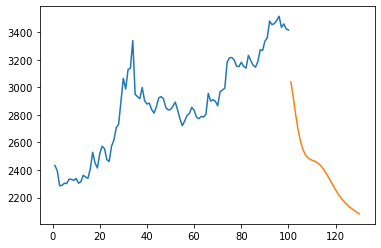

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[990:])) ## from 990 till 1090 displaying real data by blue line
plt.plot(day_pred,scaler.inverse_transform(lst_output)) ## displaying the future 30 days predicted data

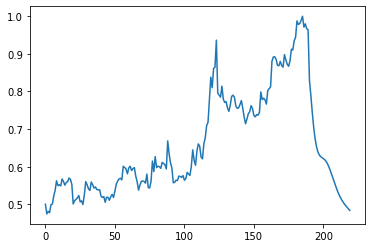

In [46]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[900:])

In [47]:
len(df3)

1120